<a href="https://colab.research.google.com/github/Q-nicorn1/Sentence-Word-Embedding-/blob/main/Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install sentencepiece

     |████████████████████████████████| 1.2 MB 12.5 MB/s 


In [2]:
!pip3 install sentence_transformers

     |████████████████████████████████| 78 kB 4.8 MB/s 
     |████████████████████████████████| 3.3 MB 24.5 MB/s 
     |████████████████████████████████| 3.3 MB 27.1 MB/s 
     |████████████████████████████████| 61 kB 402 kB/s 
     |████████████████████████████████| 895 kB 33.3 MB/s 
     |████████████████████████████████| 596 kB 43.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=1ab0a84d486937688175873c63e02d1defd268aca58e7a4e82a4fabd87b65507
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#### Import Libraries

In [3]:
import sentencepiece as spm
import tensorflow_hub as hub

from absl import logging
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sentence_transformers import SentenceTransformer

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import random

# Import NL
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
messages = [
    "That person is a real rock star",
    "I did not know the sun was a star",
    "twinkle twinkle little star",
    "please have this star shaped cake"
]

messages1 = [
    "Did you watch the movie Glass",
    "Be careful, I just broke a glass cup",
    "This window is made of glass",
    "He does not usually wear glasses"
]

def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

#### Doc2Vec - First messages

In [26]:
# Tokenization of each document
tokenized_sent = []
for s in messages:
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['that', 'person', 'is', 'a', 'real', 'rock', 'star'],
 ['i', 'did', 'not', 'know', 'the', 'sun', 'was', 'a', 'star'],
 ['twinkle', 'twinkle', 'little', 'star'],
 ['please', 'have', 'this', 'star', 'shaped', 'cake']]

In [27]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['that', 'person', 'is', 'a', 'real', 'rock', 'star'], tags=[0]),
 TaggedDocument(words=['i', 'did', 'not', 'know', 'the', 'sun', 'was', 'a', 'star'], tags=[1]),
 TaggedDocument(words=['twinkle', 'twinkle', 'little', 'star'], tags=[2]),
 TaggedDocument(words=['please', 'have', 'this', 'star', 'shaped', 'cake'], tags=[3])]

In [28]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

{'a': <gensim.models.keyedvectors.Vocab at 0x7fc12afc82d0>,
 'cake': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8390>,
 'did': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8e90>,
 'have': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8110>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8d90>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8d50>,
 'know': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8c50>,
 'little': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8710>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8b50>,
 'person': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8ed0>,
 'please': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8190>,
 'real': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8810>,
 'rock': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8b10>,
 'shaped': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8150>,
 'star': <gensim.models.keyedvectors.Vocab at 0x7fc12afc8490>,
 'sun': <gensim.models.keyedvectors.Vocab at 0x7fc12afc89

In [29]:
test_doc = word_tokenize("The bright spot in the sky at night is a star".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

[(2, 0.5050146579742432),
 (0, 0.2891657054424286),
 (1, 0.24855110049247742),
 (3, 0.1248239129781723)]

#### Doc2Vec - Second messages

In [36]:
# Tokenization of each document
tokenized_sent = []
for s in messages1:
    tokenized_sent.append(word_tokenize(s.lower()))

tagged_message1 = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_message1

[TaggedDocument(words=['did', 'you', 'watch', 'the', 'movie', 'glass'], tags=[0]),
 TaggedDocument(words=['be', 'careful', ',', 'i', 'just', 'broke', 'a', 'glass', 'cup'], tags=[1]),
 TaggedDocument(words=['this', 'window', 'is', 'made', 'of', 'glass'], tags=[2]),
 TaggedDocument(words=['he', 'does', 'not', 'usually', 'wear', 'glasses'], tags=[3])]

In [37]:
## Train doc2vec model
model = Doc2Vec(tagged_message1, vector_size = 20, window = 2, min_count = 1, epochs = 100)

## Print model vocabulary
model.wv.vocab

{',': <gensim.models.keyedvectors.Vocab at 0x7fc129084890>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fc12902ce90>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7fc129084510>,
 'broke': <gensim.models.keyedvectors.Vocab at 0x7fc129084910>,
 'careful': <gensim.models.keyedvectors.Vocab at 0x7fc129084fd0>,
 'cup': <gensim.models.keyedvectors.Vocab at 0x7fc12902cf50>,
 'did': <gensim.models.keyedvectors.Vocab at 0x7fc129092d10>,
 'does': <gensim.models.keyedvectors.Vocab at 0x7fc12902cb10>,
 'glass': <gensim.models.keyedvectors.Vocab at 0x7fc129084b50>,
 'glasses': <gensim.models.keyedvectors.Vocab at 0x7fc12902c650>,
 'he': <gensim.models.keyedvectors.Vocab at 0x7fc12902c590>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7fc129084f50>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7fc12902c250>,
 'just': <gensim.models.keyedvectors.Vocab at 0x7fc129084c10>,
 'made': <gensim.models.keyedvectors.Vocab at 0x7fc12902c810>,
 'movie': <gensim.models.keyedvectors.Vocab at 0x7fc129084410>,


In [38]:
test_doc = word_tokenize("This glass cup is fragile".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

[(0, 0.28240641951560974),
 (2, 0.21758906543254852),
 (3, 0.16199037432670593),
 (1, 0.11215199530124664)]

#### Define the pre-trained model

In [ ]:
url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" 
model = hub.load(url)
print ("module %s loaded" % url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [5]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

#### Universal Sentence Encoder - Version 4 - Transformer

In [ ]:
USE_4 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
USE_4_embeddings = embed(messages)

print(embeddings)

tf.Tensor(
[[ 0.06542601 -0.0048063   0.07828633 ... -0.0610513   0.01833819
   0.01009205]
 [ 0.01424944 -0.05419916  0.06299304 ... -0.03608732 -0.00037949
   0.04288629]
 [ 0.03047851 -0.01363901  0.08402601 ... -0.05086662 -0.01263583
   0.03433083]
 [-0.00154395  0.02722767  0.01792383 ... -0.03855469 -0.00705059
  -0.04853749]], shape=(4, 512), dtype=float32)


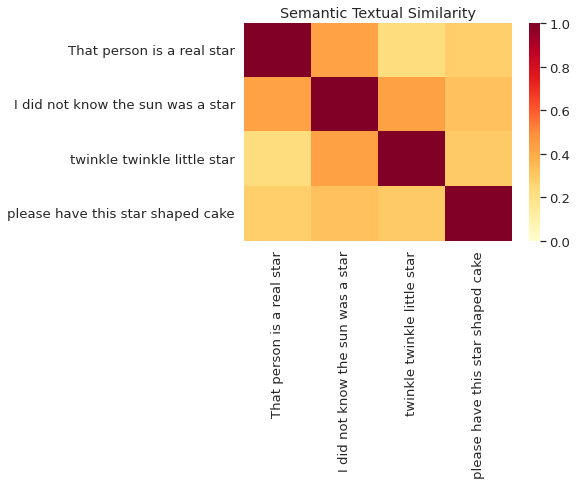

In [ ]:
run_and_plot(messages)   

In [39]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)

# For the first message
sentence_embeddings = model(messages)
query = "The bright spot in the sky at night is a star"
query_vec = model([query])[0]

random.seed(10)
for sent in messages:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock star ; similarity =  0.18940803
Sentence =  I did not know the sun was a star ; similarity =  0.5535026
Sentence =  twinkle twinkle little star ; similarity =  0.4428834
Sentence =  please have this star shaped cake ; similarity =  0.2860058


In [40]:
# For the Second message
sentence_embeddings = model(messages1)
query = "This glass cup is fragile"
query_vec = model([query])[0]

random.seed(10)
for sent in messages1:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  Did you watch the movie Glass ; similarity =  0.3120871
Sentence =  Be careful, I just broke a glass cup ; similarity =  0.6632582
Sentence =  This window is made of glass ; similarity =  0.6765582
Sentence =  He does not usually wear glasses ; similarity =  0.1990158


#### Universal Sentence Encoder - Version 5 (large) - DAN

In [41]:
USE_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

# For the first message
random.seed(10)
query = "The bright spot in the sky at night is a star"
query_vec = USE_large([query])[0]

for sent in messages:
  sim = cosine(query_vec, USE_large([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock star ; similarity =  0.2584718
Sentence =  I did not know the sun was a star ; similarity =  0.57124144
Sentence =  twinkle twinkle little star ; similarity =  0.37080938
Sentence =  please have this star shaped cake ; similarity =  0.22781506


In [42]:
# For the second message
random.seed(10)
query = "This glass cup is fragile"
query_vec = USE_large([query])[0]

for sent in messages1:
  sim = cosine(query_vec, USE_large([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  Did you watch the movie Glass ; similarity =  0.29692373
Sentence =  Be careful, I just broke a glass cup ; similarity =  0.5774079
Sentence =  This window is made of glass ; similarity =  0.6119121
Sentence =  He does not usually wear glasses ; similarity =  0.17812516


#### SentenceBERT

In [8]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [20]:
sbert_embeddings = sbert_model.encode(messages)

In [21]:
sbert_embeddings

array([[-0.03494968,  0.0930068 ,  0.22173913, ..., -0.54564893,
         0.14117332, -0.52259517],
       [ 0.80432284,  0.13548687,  0.7025126 , ...,  0.01146556,
        -0.26943377, -0.20085429],
       [-0.15255408, -0.53553027,  1.0861007 , ...,  0.18902773,
         0.32854113, -0.01655892],
       [-0.6364146 ,  0.49185452,  0.66399515, ..., -0.1638117 ,
        -0.15338907,  0.24401022]], dtype=float32)

In [22]:
len(sbert_embeddings)

4

In [23]:
print('Sample BERT embedding vector - length', len(sbert_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sbert_embeddings[0])

Sample BERT embedding vector - length 768


In [24]:
query = "The bright spot in the sky at night is a star"
query_vec = sbert_model.encode([query])[0]

In [25]:
# For the first message
for sent in messages:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock star ; similarity =  0.4415887
Sentence =  I did not know the sun was a star ; similarity =  0.58742976
Sentence =  twinkle twinkle little star ; similarity =  0.56848425
Sentence =  please have this star shaped cake ; similarity =  0.4548438


In [43]:
query = "This glass cup is fragile"
query_vec = sbert_model.encode([query])[0]

# For the second message
for sent in messages1:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  Did you watch the movie Glass ; similarity =  0.25129667
Sentence =  Be careful, I just broke a glass cup ; similarity =  0.46764034
Sentence =  This window is made of glass ; similarity =  0.6168111
Sentence =  He does not usually wear glasses ; similarity =  0.64523304


#### stsb-mpnet-base-v2

In [30]:
model_stsb = SentenceTransformer('sentence-transformers/stsb-mpnet-base-v2')
embeddings = model_stsb.encode(messages)
print(embeddings)

Downloading:   0%|          | 0.00/868 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.67k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/588 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-0.04976618  0.01038536 -0.02432728 ...  0.04873438 -0.01119051
   0.00914709]
 [ 0.04054022  0.07029091  0.0785346  ... -0.00044302 -0.11139136
   0.17215699]
 [ 0.0348506  -0.11041081 -0.02586318 ...  0.05599919  0.09075729
  -0.10412205]
 [ 0.13847028 -0.09377772  0.00816404 ...  0.02945852  0.0156264
  -0.025232  ]]


In [31]:
random.seed(10)
query = "The bright spot in the sky at night is a star"
query_vec = model_stsb.encode([query])[0]

for sent in messages:
  sim = cosine(query_vec, model_stsb.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock star ; similarity =  0.3651644
Sentence =  I did not know the sun was a star ; similarity =  0.45300698
Sentence =  twinkle twinkle little star ; similarity =  0.506486
Sentence =  please have this star shaped cake ; similarity =  0.33788043


#### stsb-roberta-base-v2

In [32]:
model_roberta = SentenceTransformer('sentence-transformers/stsb-roberta-base-v2')
embeddings = model_roberta.encode(messages)
print(embeddings)

Downloading:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.68k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/675 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 0.31708682  0.10777189  0.2171585  ...  0.4909123   0.27862063
  -0.346859  ]
 [-0.53111595 -0.7481197  -0.40125144 ... -0.17138816  0.4363719
   0.38240403]
 [-1.0654736  -0.13630964 -0.5264328  ...  1.0038153   0.22271866
   0.61979276]
 [-0.02763273 -0.21120182 -0.7567853  ... -0.23205927  0.83286095
  -0.029939  ]]


In [33]:
random.seed(10)
query = "The bright spot in the sky at night is a star"
query_vec = model_roberta.encode([query])[0]

for sent in messages:
  sim = cosine(query_vec, model_roberta.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock star ; similarity =  0.37462562
Sentence =  I did not know the sun was a star ; similarity =  0.5836014
Sentence =  twinkle twinkle little star ; similarity =  0.69395006
Sentence =  please have this star shaped cake ; similarity =  0.33815852
